# **NumPy Multiprocessing**
## Calculate Batches in diferent processes

In [4]:
def calc_grayscale(layer_map, norm_val):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """

    for i in range(layer_map.shape[0]):
        #img = test_map[i,:,:]
        img = layer_map[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val

    return layer_map


def calc_grayscale_dataset(data_dict, layer_nums=[]):
    """
    For whole data set as PyTorch Yolo tensor:
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    
    Input: User-defined tensor collection library added to the Yolo Model as attribute
    Output: Dictionary with layer number as key and corresponding normalized feature maps
    """
    
    ret_dict = {}
    norm_val = np.asarray([255], dtype=np.float32)

    if layer_nums:
        keys = layer_nums
    else:
        keys = data_dict.keys()

    for key in keys:
        # get PyTorch Yolo tensor with 3 dimensions (num_pics, width, height)
        # transform to NumPy array
        ret_dict[key] = calc_grayscale(data_dict[key][0][0].detach().numpy(), norm_val)
    
    return ret_dict

In [10]:
def calc_grayscale(layer_map, norm_val, n_img_max=64):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    
    if layer_map.shape[0] <= 64:
        n = layer_map.shape[0]
    else:
        n = n_img_max
    
    for i in range(n):
        #img = test_map[i,:,:]
        img = layer_map[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val

    return layer_map


def calc_grayscale_dataset(data_dict, layer_nums=[]):
    """
    For whole data set as PyTorch Yolo tensor:
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    
    Input: User-defined tensor collection library added to the Yolo Model as attribute
    Output: Dictionary with layer number as key and corresponding normalized feature maps
    """
    
    ret_dict = {}
    norm_val = np.asarray([255], dtype=np.float32)

    if layer_nums:
        keys = layer_nums
    else:
        keys = data_dict.keys()

    for key in keys:
        # get PyTorch Yolo tensor with 3 dimensions (num_pics, width, height)
        # transform to NumPy array
        ret_dict[key] = calc_grayscale(data_dict[key][0][0].detach().numpy(), norm_val)
    
    return ret_dict

In [15]:
layer_nums = [0,1,30,60,90,104]
#layer_nums = [0,1]

In [16]:
%%timeit
ret = calc_grayscale_dataset(tensor_collection, layer_nums=layer_nums)

46.5 ms ± 617 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
string = '123'
int_string = eval(string)

In [18]:
isinstance(int_string, int)

True

In [11]:
%%timeit
ret = calc_grayscale_dataset(tensor_collection, layer_nums=layer_nums)

16.9 ms ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
ret[30].shape

(256, 28, 40)

In [ ]:
def calc_grayscale_multi(layer_map):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    norm_val = np.asarray([255], dtype=np.float32)
    for i in range(layer_map.shape[0]):
        #img = test_map[i,:,:]
        img = layer_map[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val

    return layer_map

In [29]:
tensor_collection[0][0][0].size()

torch.Size([32, 448, 640])

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import multiprocess as multiprocessing

In [2]:
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

In [3]:
tensor_collection = load_pickle('tensor_collection.pkl')

Object loaded


In [43]:
layer_nums = [0,1,30,60]
import numpy as np
def worker(procnum, send_end):
    '''worker function'''
    result = str(procnum) + ' represent!'
    print(result)
    send_end.send(result)
    
def calc_grayscale_multi(layer_num, layer_map, send_end):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    import numpy as np
    norm_val = np.asarray([255], dtype=np.float32)
    ret_dict = {}
    for i in range(layer_map.shape[0]):
        #img = test_map[i,:,:]
        img = layer_map[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val

    #return layer_map
    ret_dict[layer_num] = layer_map
    #print(f"Layer Num = {layer_num} \t Type = {type(layer_map)} \n Layer maxVal = {layer_map.max()}, Layer minVal = {layer_map.min()} with \n Layer Map = {layer_map}")
    
    send_end.send(ret_dict)

    
### BATCH
def calc_grayscale_multi_batch(layer_nums_batch, img_dict, send_end):
    """
    layer_nums --> batch of layer numbers
    img_dict --> tensor collection
    
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    import numpy as np
    norm_val = np.asarray([255], dtype=np.float32)
    ret_dict = {}
    
    for layer_num in layer_nums_batch:
        layer_map = img_dict[layer_num][0][0].detach().numpy()
        
        for i in range(layer_map.shape[0]):
            #img = test_map[i,:,:]
            img = layer_map[i]
            #print("TEST")
            v_min = np.asarray([img.min()], dtype=np.float32)
            v_max = np.asarray([img.max()], dtype=np.float32)
            img -= v_min
            img /= (v_max - v_min)
            img *= norm_val

    #return layer_map
        ret_dict[layer_num] = layer_map
    #print(f"Layer Num = {layer_num} \t Type = {type(layer_map)} \n Layer maxVal = {layer_map.max()}, Layer minVal = {layer_map.min()} with \n Layer Map = {layer_map}")
    
    send_end.send(ret_dict)

def main(tensor_collection, layer_nums, num_batches=3):
    jobs = []
    pipe_list = []
    batches = np.array_split(layer_nums, num_batches)
    
    for batch in batches:
        recv_end, send_end = multiprocessing.Pipe(False)
        p = multiprocessing.Process(target=calc_grayscale_multi_batch, args=(batch, tensor_collection, send_end))
        jobs.append(p)
        pipe_list.append(recv_end)
        p.start()

    result_list = [x.recv() for x in pipe_list]
    
    for proc in jobs:
        proc.join()
    
    #print(result_list)
    return result_list

- too many processes
- modularize with batch sizes and variable amount of processes

In [46]:
%%timeit
ret = main(tensor_collection, layer_nums, num_batches=3)

15.3 s ± 229 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
ret

[{0: array([[[      45.22,      38.088,      38.088, ...,      38.088,      38.088,      45.866],
          [     47.871,       49.98,       49.98, ...,       49.98,       49.98,      47.628],
          [     47.871,       49.98,       49.98, ...,       49.98,       49.98,      47.628],
          ...,
          [     47.871,       49.98,       49.98, ...,       49.98,       49.98,      47.628],
          [     47.871,       49.98,       49.98, ...,       49.98,       49.98,      47.628],
          [     53.766,      53.147,      53.147, ...,      53.147,      53.147,      54.346]],
  
         [[     46.501,      54.978,      54.978, ...,      54.978,      54.978,      61.685],
          [     50.997,      58.452,      58.452, ...,      58.452,      58.452,      68.676],
          [     50.997,      58.452,      58.452, ...,      58.452,      58.452,      68.676],
          ...,
          [     50.997,      58.452,      58.452, ...,      58.452,      58.452,      68.676],
          [  

In [20]:
len(ret)

4

In [37]:
layer_nums = [0,1,30,60,90,104]
batch_size = 3
sub_lists = np.array_split(layer_nums, batch_size)

In [40]:
sub_lists

[array([0, 1]), array([30, 60]), array([ 90, 104])]

In [28]:
test = tensor_collection[0][0][0].detach().numpy()

In [29]:
test.shape

(32, 448, 640)

In [30]:
test_bytes = test.tobytes()

In [31]:
test_ret = np.frombuffer(test_bytes, dtype=np.float32)

In [32]:
test_ret2 = np.reshape(test_ret, newshape=(32,448,640))

In [33]:
test_ret2.shape

(32, 448, 640)

In [38]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import multiprocess as multiprocessing
import numba
%matplotlib inline

In [2]:
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

In [19]:
tensor_collection = load_pickle('tensor_collection_new.pkl')

Object loaded


In [43]:
def calc_grayscale(layer_imgs, norm_val, npad, n_img_max=64, row_break_after=8):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    
    if layer_imgs.shape[0] <= 64:
        n = layer_imgs.shape[0]
    else:
        n = n_img_max
    
    # normalize images
    for i in range(n):
        #img = test_map[i,:,:]
        img = layer_imgs[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val
    
    # pad batch
    layer_imgs = np.pad(layer_imgs, pad_width=npad, mode='constant', constant_values=255)

    # pad and concatenate
    #padded_data = np.pad(data, pad_width=npad, mode='constant', constant_values=255)
    rows = []
    for i in range(0, n, row_break_after):
        #concatenate arrays along "w" axis
        row = np.concatenate(layer_imgs[i:i+row_break_after], axis=1)
        rows.append(row)
    
    #concatenate arrays along "h" axis
    return np.concatenate(rows, axis=0)


def calc_grayscale_dataset(data_dict, layer_nums=[]):
    """
    For whole data set as PyTorch Yolo tensor:
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    
    Input: User-defined tensor collection library added to the Yolo Model as attribute
    Output: Dictionary with layer number as key and corresponding normalized feature maps
    """
    
    ret_dict = {}
    norm_val = np.asarray([255], dtype=np.float32) # normalization value of 255 (grayscale --> white)
    padding_width = 5
    npad = ((0,0), (padding_width, padding_width), (padding_width, padding_width))

    if layer_nums:
        keys = layer_nums
    else:
        keys = data_dict.keys()

    for key in keys:
        # get PyTorch Yolo tensor with 3 dimensions (num_pics, width, height)
        # transform to NumPy array
        ret_dict[key] = calc_grayscale(data_dict[key][0].detach().numpy(), norm_val, npad)
        
    
    return ret_dict

In [33]:
layer_nums = [0,1,2,30,60,90,100,104]
layer_nums = []
test = tensor_collection

In [44]:
ret = calc_grayscale_dataset(test, layer_nums=layer_nums)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUse of unsupported NumPy function 'numpy.pad' or unsupported use of the function.
[1m
File "..\..\..\..\..\..\AppData\Local\Temp\ipykernel_16848\3252689246.py", line 26:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m
[0m[1mDuring: typing of get attribute at C:\Users\flfo\AppData\Local\Temp\ipykernel_16848\3252689246.py (26)[0m
[1m
File "..\..\..\..\..\..\AppData\Local\Temp\ipykernel_16848\3252689246.py", line 26:[0m
[1m<source missing, REPL/exec in use?>[0m


(-0.5, 5199.5, 1831.5, -0.5)

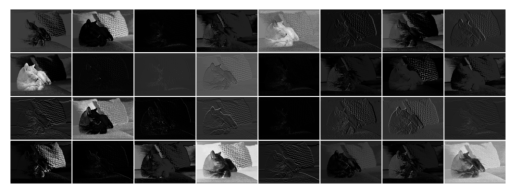

In [36]:
plt.imshow(ret[0], cmap='gray')
plt.axis('off')

In [42]:
%timeit ret = calc_grayscale_dataset(test, layer_nums=layer_nums)

228 ms ± 8.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
